In [1]:
import numpy as np
import torch
from torchvision import transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import random
import nltk

from data_loader import *

# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

In [2]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

img_path = '/home/shashankv/Study/CS838/CS838_Project/data/flickr30k-images'
ann_path = '/home/shashankv/Study/CS838/CS838_Project/data/results_20130124.token'

dataset = Flickr30kData(img_root=img_path,
                       ann_file=ann_path,
                       transform=transform,
                       fetch_mode='retrieval')

In [3]:
# Batch size should always be 1
data_loader = data.DataLoader(dataset=dataset,
                              batch_size=1,
                              shuffle=True,
                              )

dataloader_iterator = iter(data_loader)

for i in range(len(dataset)):
    img, caption_gloves, caption = next(dataloader_iterator)
    break

### Visualizing the Flickr30K data and target

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


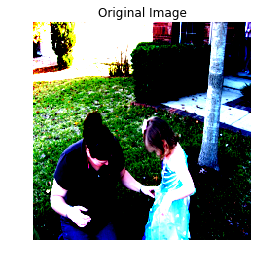

A woman admires a little girl 's blue dress


In [4]:
plt.imshow(img[0].permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')
plt.show()

print(caption[0])